## **Business Problem Statement**

The objective of this project is to analyze the structure of the Google Play Store market and identify key drivers influencing app revenue and demand.


## **We aim to:**

*   Segment apps using K-Means clustering
*   Predict high-revenue apps using Logistic Regression
*   Interpret results using economic and financial concepts

## **DATA LOADING**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
import kagglehub
import os

path = kagglehub.dataset_download("gauthamp10/google-playstore-apps")
print(os.listdir(path))

Using Colab cache for faster access to the 'google-playstore-apps' dataset.
['Google-Playstore.csv']


In [7]:
df = pd.read_csv(os.path.join(path, "Google-Playstore.csv"))
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


## **DATA CLEANING AND PREPROCESSING**

**Step 1: Basic Inspection**

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


**Step 2: Remove Duplicates**

In [9]:
df.drop_duplicates(inplace=True)

**Step 3: Clean Installs Column**

In [10]:
df['Installs'] = df['Installs'].str.replace('+','', regex=False)
df['Installs'] = df['Installs'].str.replace(',','', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

**Step 4: Clean Price Column**

In [12]:
df['Price'].dtype

dtype('float64')

**Step 5: Convert Rating to Numeric**

In [13]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

**Step 6: Handle Missing Values**

In [14]:
df = df.dropna(subset=['Rating','Installs'])

**Step 7: Create Revenue Feature**

In [15]:
df['Revenue'] = df['Price'] * df['Installs']

**Step 8: Create Target Variable (High Revenue App)**

In [16]:
df['High_Revenue'] = np.where(df['Installs'] >= 1000000, 1, 0)

## **EXPLORATORY DATA ANALYSIS (EDA)**

**1️⃣ Distribution of Ratings**

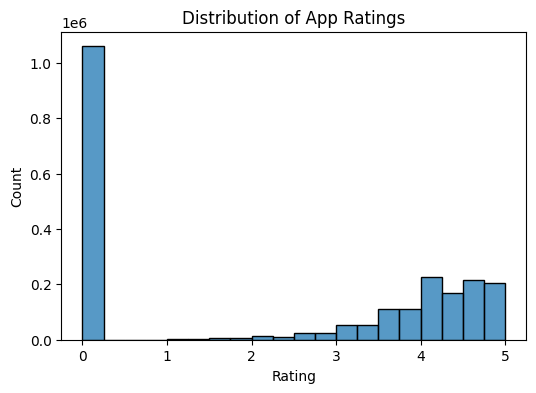

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df['Rating'], bins=20)
plt.title("Distribution of App Ratings")
plt.show()

**2️⃣ Distribution of Installs (Log Scale)**

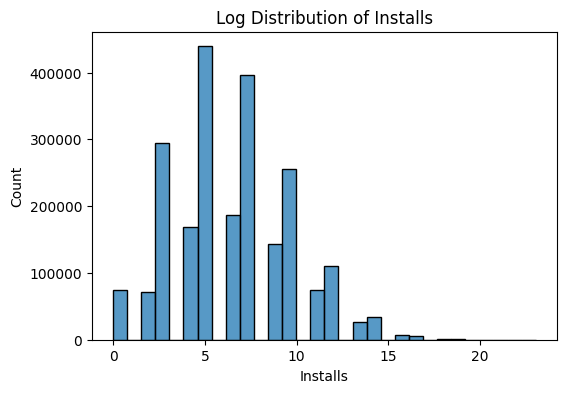

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(df['Installs']), bins=30)
plt.title("Log Distribution of Installs")
plt.show()

**3️⃣ Price vs Installs**

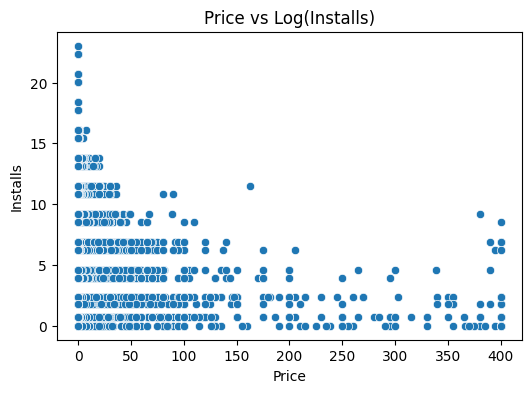

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Price'], y=np.log1p(df['Installs']))
plt.title("Price vs Log(Installs)")
plt.show()

**4️⃣ Top Categories**

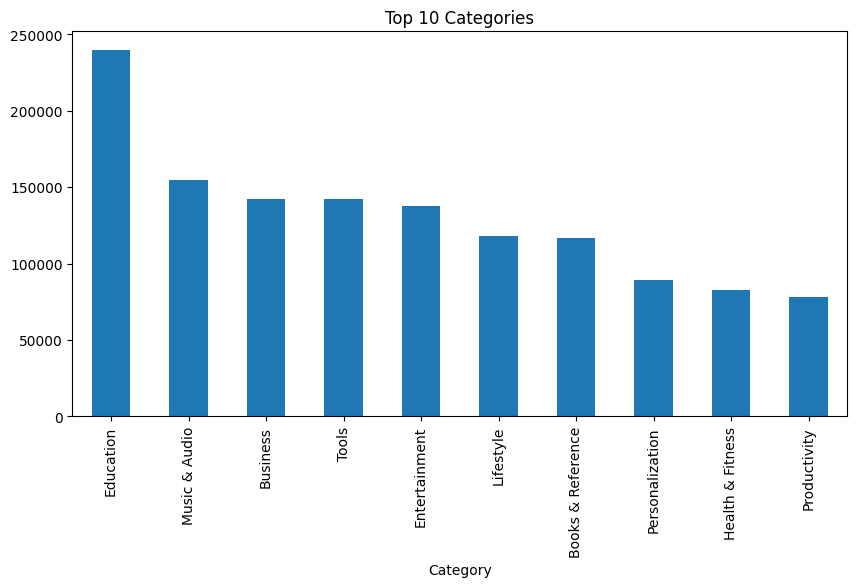

In [20]:
plt.figure(figsize=(10,5))
df['Category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Categories")
plt.show()

**5️⃣ Correlation Heatmap**

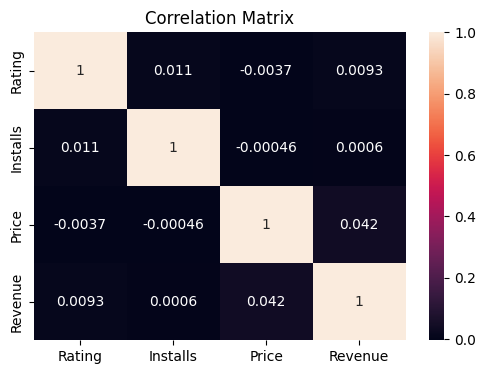

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Rating','Installs','Price','Revenue']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

## **K-MEANS CLUSTERING**

### **Objective:**

#### Segment apps based on market behavior.


  **Step 1: Select Features**

In [24]:
cluster_data = df[['Rating','Installs','Price']]

**Step 2: Scale Data**

In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

**Step 3: Elbow Method**



> Choose K = 3



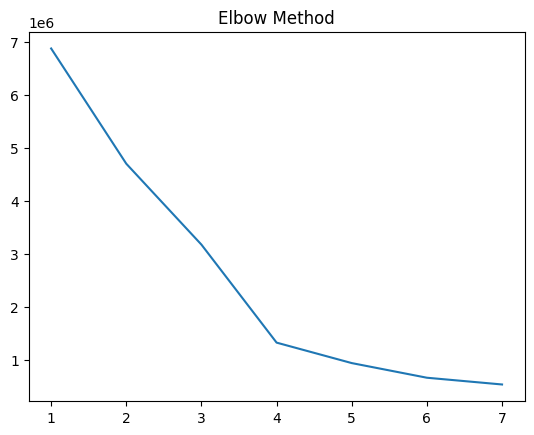

In [26]:
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,8), wcss)
plt.title("Elbow Method")
plt.show()

**Step 4: Apply K-Means**

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

**Step 5: Visualize Clusters**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


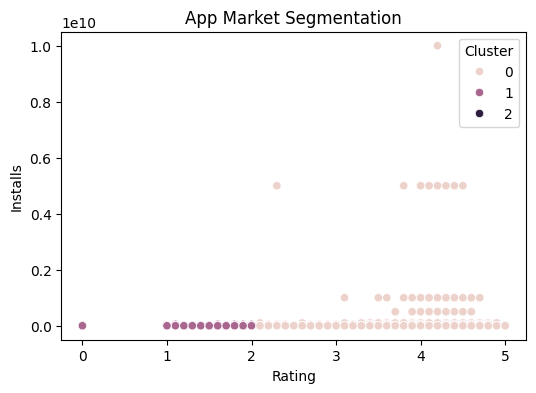

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Rating', y='Installs', hue='Cluster', data=df)
plt.title("App Market Segmentation")
plt.show()

## **LOGISTIC REGRESSION MODEL**

### **Objective:**
#### Predict High Revenue Apps

**Step 1: Define Features & Target**



In [29]:
X = df[['Rating','Price']]
y = df['High_Revenue']

**Step 2: Train-Test Split**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**Step 3: Train Model**

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Step 4: Evaluate Model

In [32]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9794066830757228
[[672871      0]
 [ 14148      0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    672871
           1       0.00      0.00      0.00     14148

    accuracy                           0.98    687019
   macro avg       0.49      0.50      0.49    687019
weighted avg       0.96      0.98      0.97    687019



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **BUSINESS INTERPRETATION**
	1.	Majority of apps are free, indicating a freemium-based market structure.
	2.	Price negatively impacts installs, confirming the law of demand.
	3.	Clustering reveals three major market segments:
	•	High-install low-price apps
	•	Moderate apps
	•	Low-install premium apps
	4.	Logistic regression shows rating and price influence probability of high revenue.
	5.	Developers can optimize pricing strategies using these insights.

## **Economic Concepts Applied**
	•	Demand and Supply
	•	Price Elasticity
	•	Market Segmentation
	•	Revenue Optimization
	•	Risk Assessment